In [151]:
#importamos las librerias necesarias
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import variation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [152]:
# =====================
# 2. Cargar datasets
# =====================
path = "./Dataset/"

df= pd.read_csv(path + "strava_full_data.csv")


In [153]:
df.head()

,Unnamed: 0,average_speed,max_speed,average_heartrate,max_heartrate,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
0,0,3.142,5.3,NaN,NaN,11443.2,1:03:50,1:00:42,73.0,115.0,Run,2020-01-18T12:00:36,12
1,1,3.410,7.4,NaN,NaN,9486.0,0:48:51,0:46:22,36.1,96.9,Run,2020-01-17T19:00:58,13
2,2,3.273,4.0,NaN,NaN,8854.8,0:45:32,0:45:05,16.0,117.2,Run,2020-01-13T18:37:29,3
3,3,3.259,4.0,NaN,NaN,7717.5,0:39:35,0:39:28,10.0,131.6,Run,2020-01-10T18:36:52,2
4,4,3.222,4.0,NaN,NaN,7659.5,0:41:33,0:39:37,12.0,107.4,Run,2020-01-08T18:37:24,17


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1121 non-null   int64  
 1   average_speed         1121 non-null   float64
 2   max_speed             1121 non-null   float64
 3   average_heartrate     190 non-null    float64
 4   max_heartrate         190 non-null    float64
 5   distance              1121 non-null   float64
 6   elapsed_time          1120 non-null   object 
 7   moving_time           1120 non-null   object 
 8   total_elevation_gain  1121 non-null   float64
 9   elev_high             1072 non-null   float64
 10  type                  1121 non-null   object 
 11  start_date_local      1121 non-null   object 
 12  kudos_count           1121 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 114.0+ KB


In [155]:
df = df.drop(columns=['average_heartrate', 'max_heartrate'])


In [156]:
df.isna().sum()

Unnamed: 0               0
average_speed            0
max_speed                0
distance                 0
elapsed_time             1
moving_time              1
total_elevation_gain     0
elev_high               49
type                     0
start_date_local         0
kudos_count              0
dtype: int64

In [157]:
df.describe()

,Unnamed: 0,average_speed,max_speed,distance,total_elevation_gain,elev_high,kudos_count
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1072.000000,1121.000000
mean,560.000000,3.029095,5.142908,8428.107315,240.820250,404.417071,5.365745
std,323.749131,1.082123,2.610386,9412.084936,1453.707497,1072.269702,5.302631
min,0.000000,0.000000,0.000000,0.000000,0.000000,-154.200000,0.000000
25%,280.000000,2.481000,3.900000,3866.900000,8.000000,97.550000,1.000000
50%,560.000000,3.061000,4.700000,7025.600000,31.000000,113.600000,4.000000
75%,840.000000,3.361000,5.900000,9920.800000,93.000000,225.175000,9.000000
max,1120.000000,6.373000,29.200000,121660.000000,28620.000000,12606.800000,32.000000


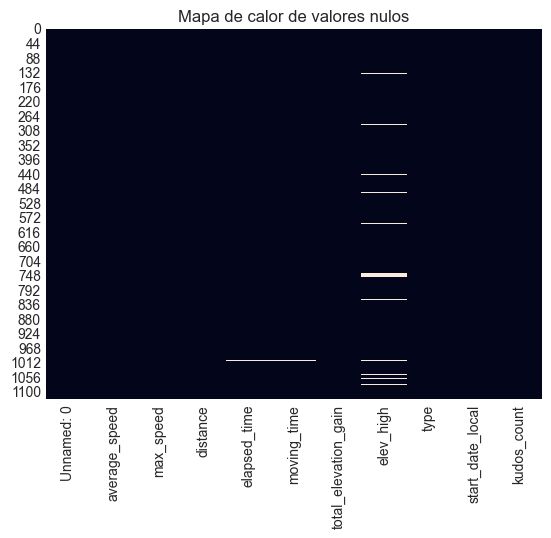

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

In [159]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['elapsed_time'] = pd.to_timedelta(df['elapsed_time']).dt.total_seconds()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1121 non-null   int64         
 1   average_speed         1121 non-null   float64       
 2   max_speed             1121 non-null   float64       
 3   distance              1121 non-null   float64       
 4   elapsed_time          1120 non-null   float64       
 5   moving_time           1120 non-null   object        
 6   total_elevation_gain  1121 non-null   float64       
 7   elev_high             1072 non-null   float64       
 8   type                  1121 non-null   object        
 9   start_date_local      1121 non-null   datetime64[ns]
 10  kudos_count           1121 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 96.5+ KB


In [161]:
df.head()

,Unnamed: 0,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
0,0,3.142,5.3,11443.2,3830.0,1:00:42,73.0,115.0,Run,2020-01-18 12:00:36,12
1,1,3.410,7.4,9486.0,2931.0,0:46:22,36.1,96.9,Run,2020-01-17 19:00:58,13
2,2,3.273,4.0,8854.8,2732.0,0:45:05,16.0,117.2,Run,2020-01-13 18:37:29,3
3,3,3.259,4.0,7717.5,2375.0,0:39:28,10.0,131.6,Run,2020-01-10 18:36:52,2
4,4,3.222,4.0,7659.5,2493.0,0:39:37,12.0,107.4,Run,2020-01-08 18:37:24,17


<Axes: xlabel='type'>

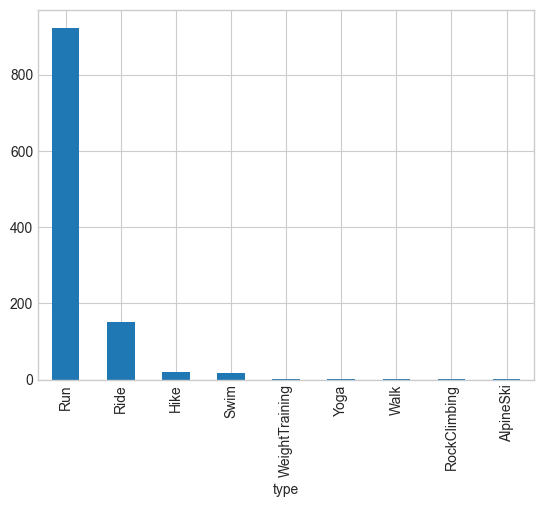

In [162]:
df['type'].value_counts().plot(kind='bar')


In [163]:
df.groupby('type')['elev_high'].apply(lambda x: x.isna().sum())


type
AlpineSki          0
Hike               4
Ride               4
RockClimbing       1
Run               18
Swim              17
Walk               1
WeightTraining     2
Yoga               2
Name: elev_high, dtype: int64

In [164]:
df = df[df['type'] == 'Run']


In [165]:
df['type'].value_counts()


type
Run    924
Name: count, dtype: int64

In [166]:
df = df.drop(columns=['type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            924 non-null    int64         
 1   average_speed         924 non-null    float64       
 2   max_speed             924 non-null    float64       
 3   distance              924 non-null    float64       
 4   elapsed_time          923 non-null    float64       
 5   moving_time           923 non-null    object        
 6   total_elevation_gain  924 non-null    float64       
 7   elev_high             906 non-null    float64       
 8   start_date_local      924 non-null    datetime64[ns]
 9   kudos_count           924 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 79.4+ KB


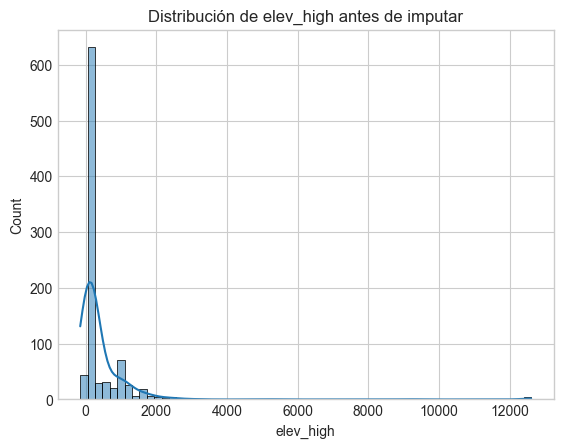

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['elev_high'], kde=True)
plt.title('Distribución de elev_high antes de imputar')
plt.show()


In [168]:
mediana_elev = df['elev_high'].median()
print("Mediana de elev_high:", mediana_elev)

df['elev_high'].fillna(mediana_elev, inplace=True)


Mediana de elev_high: 117.4


C:\Users\wladi\AppData\Local\Temp\ipykernel_7412\152875631.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['elev_high'].fillna(mediana_elev, inplace=True)


In [169]:
print("Antes:", df.shape)
df = df.dropna()
print("Después:", df.shape)
df.isna().sum()


Antes: (924, 10)
Después: (923, 10)


Unnamed: 0              0
average_speed           0
max_speed               0
distance                0
elapsed_time            0
moving_time             0
total_elevation_gain    0
elev_high               0
start_date_local        0
kudos_count             0
dtype: int64

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            923 non-null    int64         
 1   average_speed         923 non-null    float64       
 2   max_speed             923 non-null    float64       
 3   distance              923 non-null    float64       
 4   elapsed_time          923 non-null    float64       
 5   moving_time           923 non-null    object        
 6   total_elevation_gain  923 non-null    float64       
 7   elev_high             923 non-null    float64       
 8   start_date_local      923 non-null    datetime64[ns]
 9   kudos_count           923 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 79.3+ KB


In [171]:
df['moving_time'].unique()


array(['1:00:42', '0:46:22', '0:45:05', '0:39:28', '0:39:37', '0:55:12',
       '0:52:13', '0:46:57', '0:11:18', '0:40:53', '0:52:19', '0:11:45',
       '1:59:13', '0:52:50', '3:28:24', '0:33:22', '2:02:03', '0:29:29',
       '0:55:52', '0:32:34', '0:52:12', '0:28:40', '1:30:15', '0:52:20',
       '1:03:42', '0:53:09', '0:31:45', '0:03:13', '0:48:20', '0:19:12',
       '0:33:41', '0:54:22', '0:36:50', '0:32:20', '1:08:31', '0:48:21',
       '0:50:45', '0:48:50', '0:49:40', '0:49:17', '0:12:53', '0:08:05',
       '0:27:01', '0:38:25', '0:37:37', '0:47:35', '0:44:08', '0:33:04',
       '1:16:31', '1:26:13', '0:46:58', '0:38:02', '0:52:07', '0:40:15',
       '0:44:35', '0:36:55', '0:49:01', '0:39:24', '0:57:16', '0:44:27',
       '0:10:53', '1:08:38', '0:32:05', '0:29:30', '0:55:13', '0:35:06',
       '0:33:45', '0:51:54', '0:44:30', '0:36:18', '0:33:44', '0:36:20',
       '0:40:36', '0:55:23', '0:31:07', '0:19:59', '0:28:06', '12:03:23',
       '14:58:14', '0:29:47', '0:26:32', '0:37:18'

In [172]:
df['moving_time'] = pd.to_timedelta(df['moving_time'], errors='coerce')


In [173]:
df['moving_time_min'] = df['moving_time'].dt.total_seconds() / 60

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Unnamed: 0            923 non-null    int64          
 1   average_speed         923 non-null    float64        
 2   max_speed             923 non-null    float64        
 3   distance              923 non-null    float64        
 4   elapsed_time          923 non-null    float64        
 5   moving_time           923 non-null    timedelta64[ns]
 6   total_elevation_gain  923 non-null    float64        
 7   elev_high             923 non-null    float64        
 8   start_date_local      923 non-null    datetime64[ns] 
 9   kudos_count           923 non-null    int64          
 10  moving_time_min       923 non-null    float64        
dtypes: datetime64[ns](1), float64(7), int64(2), timedelta64[ns](1)
memory usage: 86.5 KB


In [175]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Unnamed: 0', 'average_speed', 'max_speed', 'distance', 'elapsed_time',
       'total_elevation_gain', 'elev_high', 'kudos_count', 'moving_time_min'],
      dtype='object')

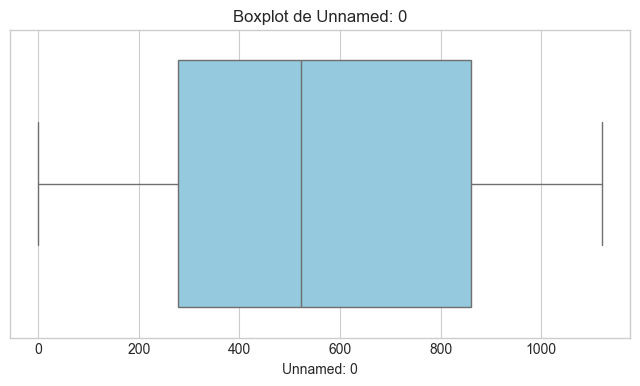

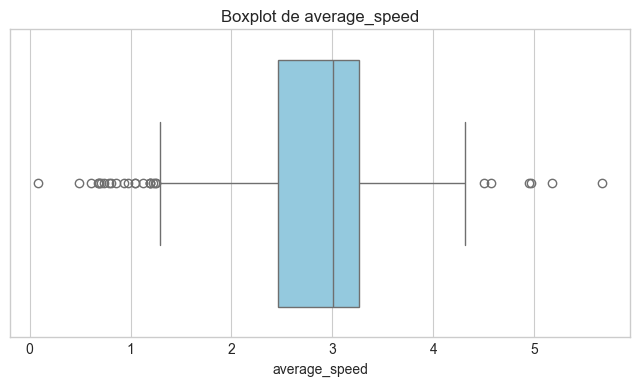

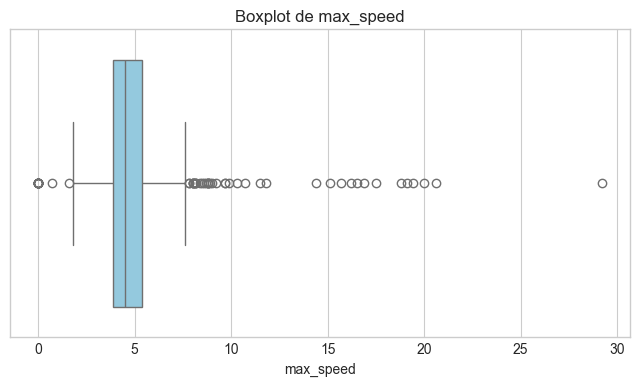

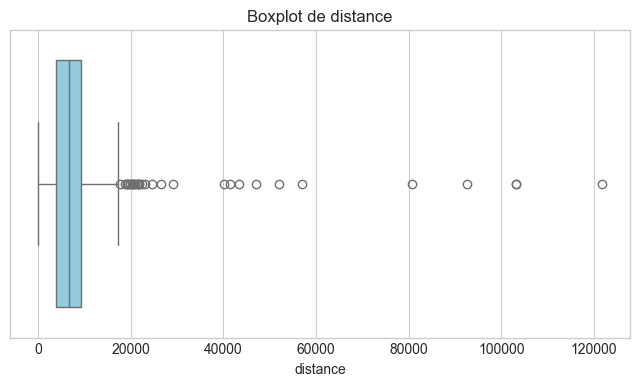

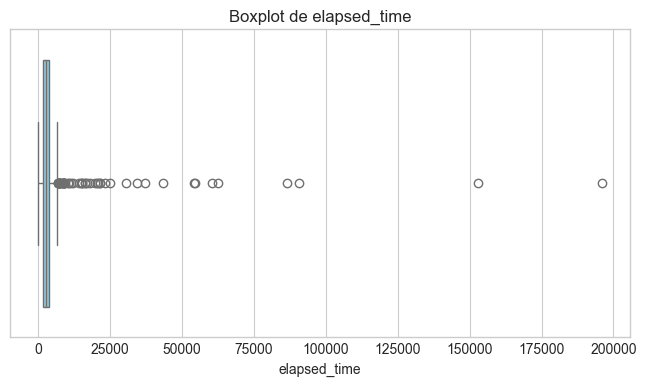

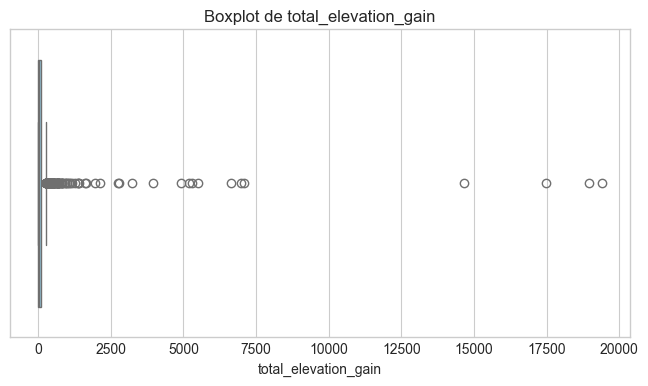

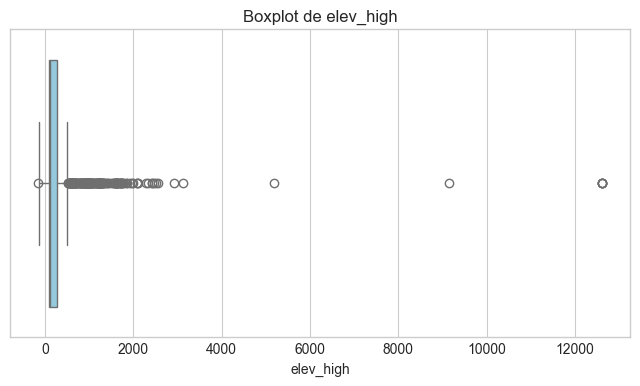

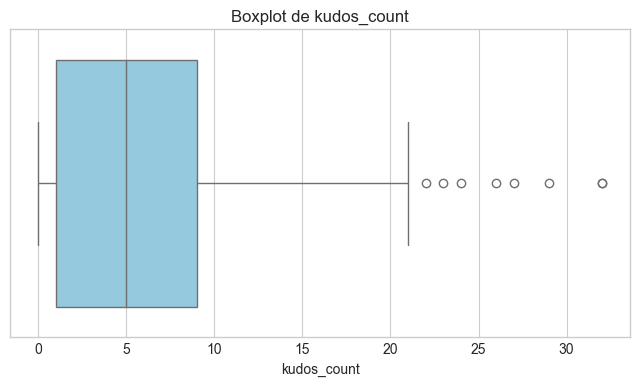

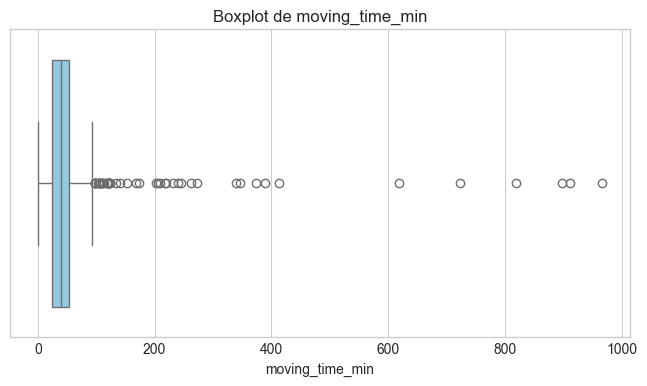

In [176]:
plt.style.use('seaborn-v0_8-whitegrid')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


In [177]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")


Unnamed: 0: 0 outliers
average_speed: 28 outliers
max_speed: 60 outliers
distance: 32 outliers
elapsed_time: 51 outliers
total_elevation_gain: 116 outliers
elev_high: 196 outliers
kudos_count: 8 outliers
moving_time_min: 49 outliers


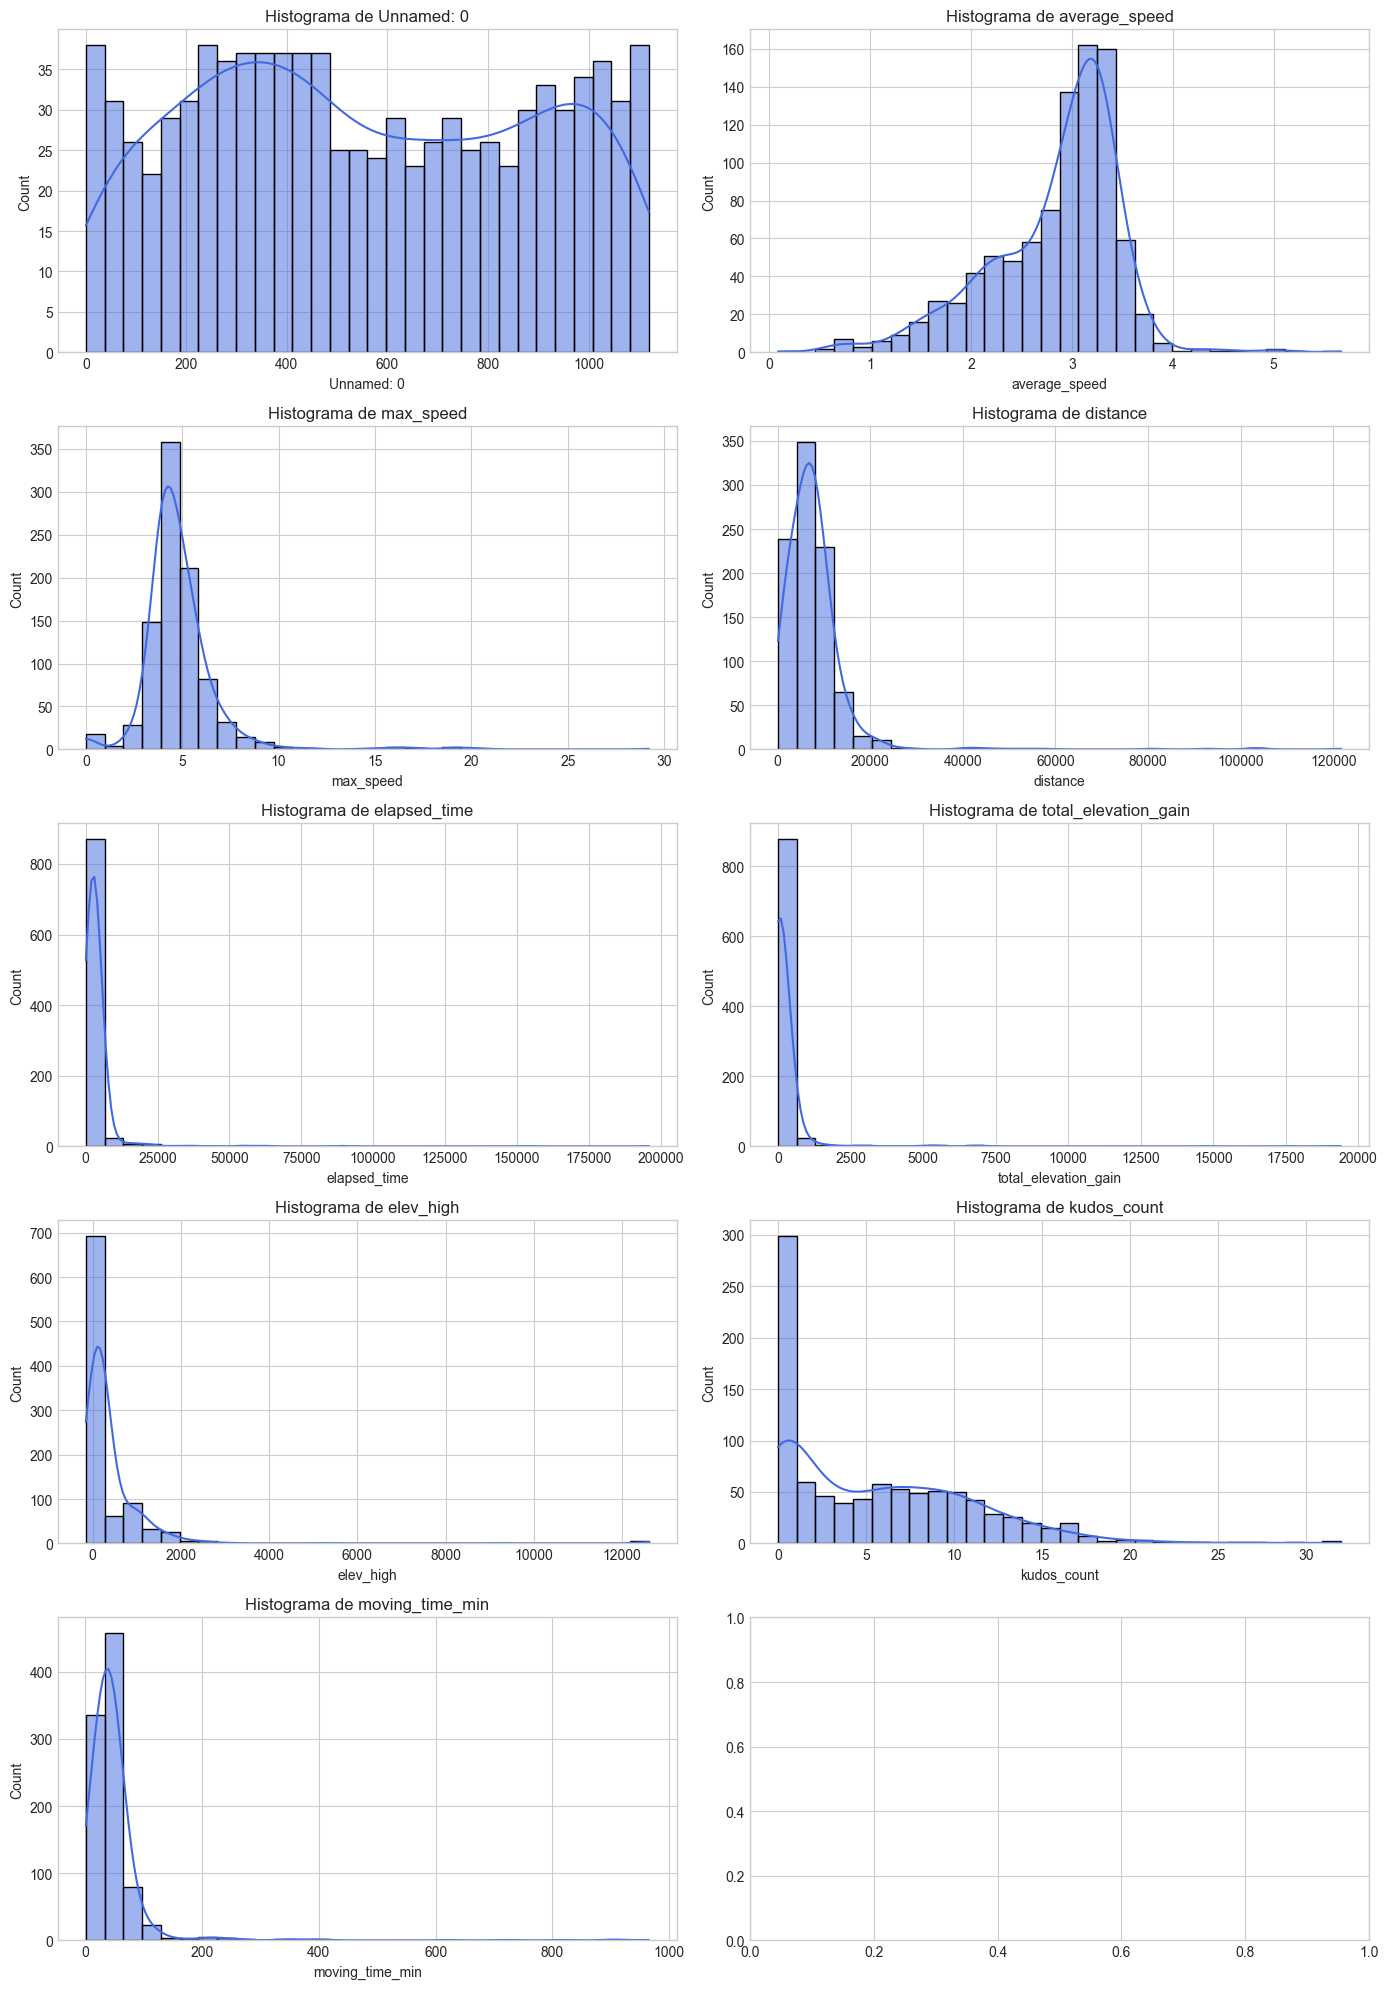

In [178]:
fig, axes = plt.subplots(nrows=len(numeric_cols)//2 + 1, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


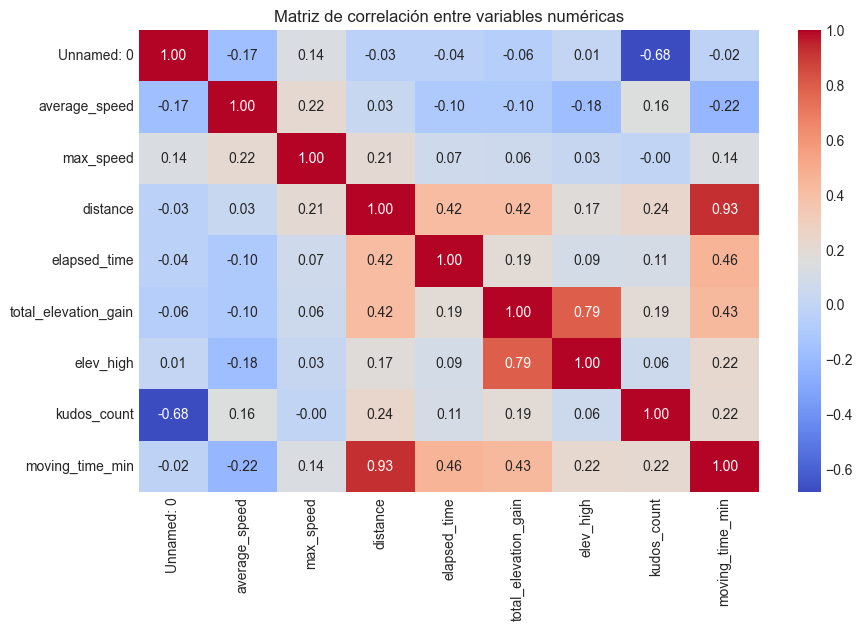

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [180]:
df = df.drop(columns=['Unnamed: 0'])

<Axes: xlabel='distance', ylabel='moving_time_min'>

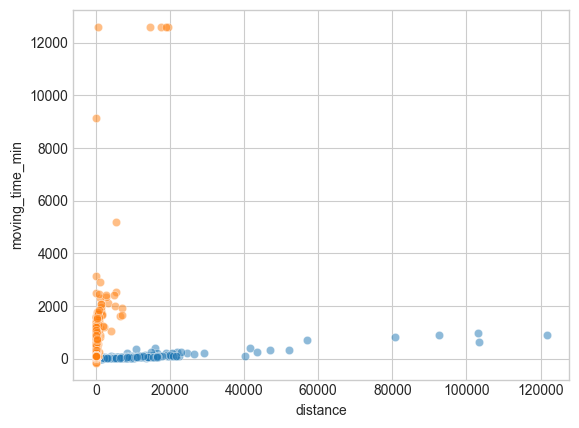

In [181]:
sns.scatterplot(data=df, x='distance', y='moving_time_min', alpha=0.5)
sns.scatterplot(data=df, x='total_elevation_gain', y='elev_high', alpha=0.5)

<Axes: xlabel='distance', ylabel='kudos_count'>

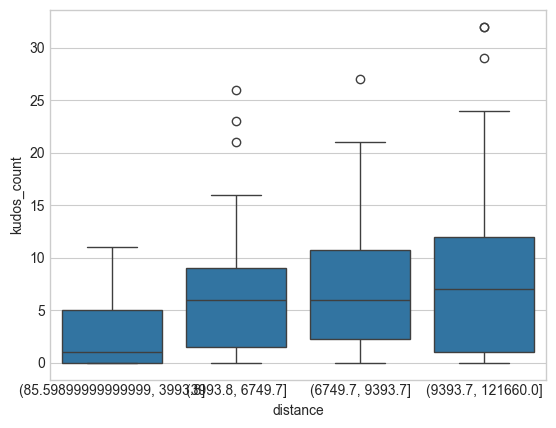

In [182]:
sns.boxplot(x=pd.qcut(df['distance'], 4), y=df['kudos_count'])


In [ ]:
df = df[df['distance'] < 50000]
df = df[df['moving_time_min'] < 2000]
df = df[df['elev_high'] < 2000]

<Axes: xlabel='distance', ylabel='moving_time_min'>

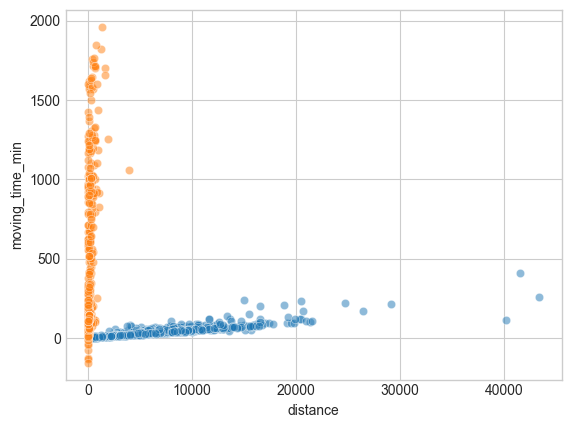

In [184]:
sns.scatterplot(data=df, x='distance', y='moving_time_min', alpha=0.5)
sns.scatterplot(data=df, x='total_elevation_gain', y='elev_high', alpha=0.5)

In [185]:
df.shape

(899, 10)

In [186]:
df['pace_min_per_km'] = df['moving_time_min'] / (df['distance'] / 1000)

In [187]:
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df['distance'] >= lower) & (df['distance'] <= upper)]


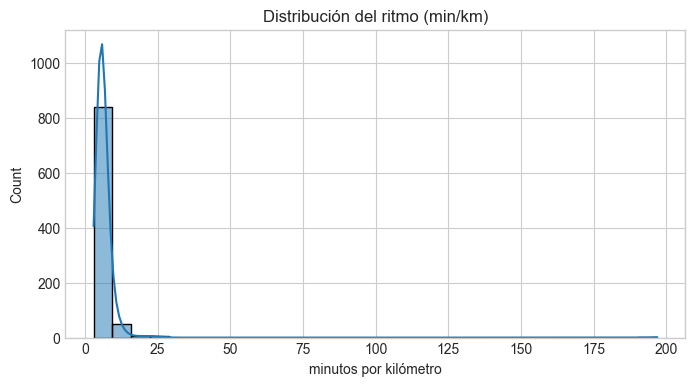

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['pace_min_per_km'], bins=30, kde=True)
plt.title('Distribución del ritmo (min/km)')
plt.xlabel('minutos por kilómetro')
plt.show()


In [189]:
df['pace_min_per_km'].describe()


count    899.000000
mean       6.478737
std        6.756662
min        2.939781
25%        5.105380
50%        5.523056
75%        6.631824
max      196.845794
Name: pace_min_per_km, dtype: float64

In [190]:
Q1 = df['pace_min_per_km'].quantile(0.25)
Q3 = df['pace_min_per_km'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['pace_min_per_km'] >= lower) & (df['pace_min_per_km'] <= upper)]


In [191]:
df = df[df['pace_min_per_km'] <= 15]


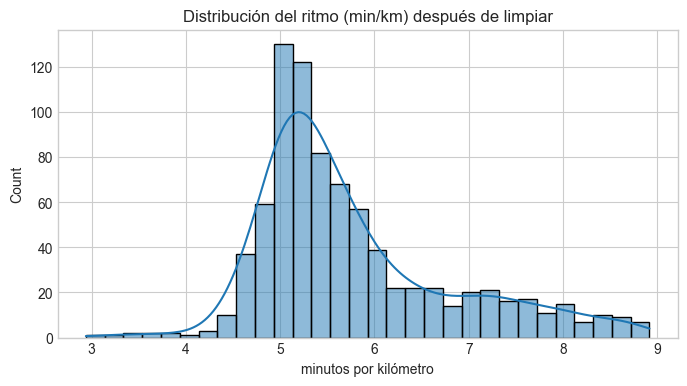

In [192]:
plt.figure(figsize=(8,4))
sns.histplot(df['pace_min_per_km'], bins=30, kde=True)
plt.title('Distribución del ritmo (min/km) después de limpiar')
plt.xlabel('minutos por kilómetro')
plt.show()


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 0 to 1119
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   average_speed         829 non-null    float64        
 1   max_speed             829 non-null    float64        
 2   distance              829 non-null    float64        
 3   elapsed_time          829 non-null    float64        
 4   moving_time           829 non-null    timedelta64[ns]
 5   total_elevation_gain  829 non-null    float64        
 6   elev_high             829 non-null    float64        
 7   start_date_local      829 non-null    datetime64[ns] 
 8   kudos_count           829 non-null    int64          
 9   moving_time_min       829 non-null    float64        
 10  pace_min_per_km       829 non-null    float64        
dtypes: datetime64[ns](1), float64(8), int64(1), timedelta64[ns](1)
memory usage: 77.7 KB


In [194]:
def categorize_pace(pace):
    if pace < 4.5:
        return 'Rápido'
    elif pace <= 6.5:
        return 'Moderado'
    else:
        return 'Lento'

df['pace_category'] = df['pace_min_per_km'].apply(categorize_pace)


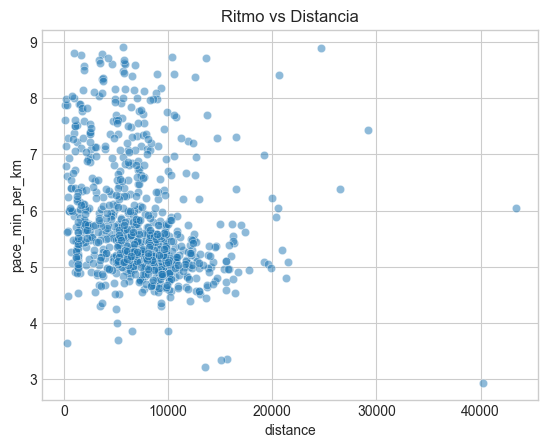

In [195]:
sns.scatterplot(data=df, x='distance', y='pace_min_per_km', alpha=0.5)
plt.title('Ritmo vs Distancia')
plt.show()


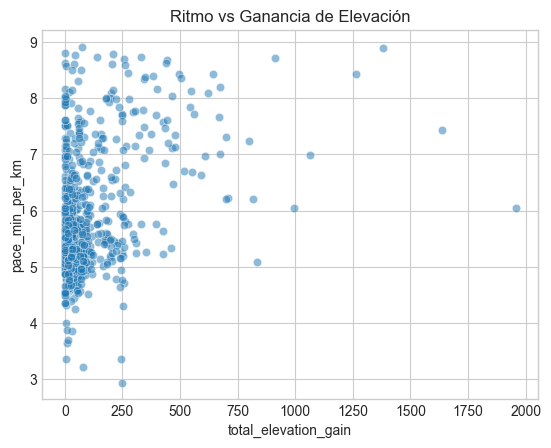

In [196]:
sns.scatterplot(data=df, x='total_elevation_gain', y='pace_min_per_km', alpha=0.5)
plt.title('Ritmo vs Ganancia de Elevación')
plt.show()


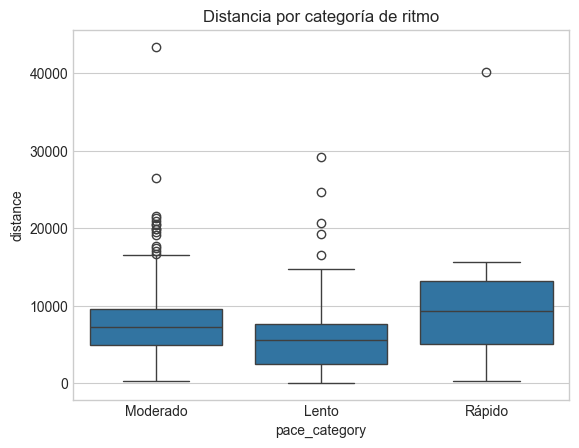

In [197]:
sns.boxplot(data=df, x='pace_category', y='distance')
plt.title('Distancia por categoría de ritmo')
plt.show()
